In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("2025-11-15_17-20-44-472.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,2.999688,-0.360312,-0.240000,0.000000e+00,2.000000e-09
1,3.020625,-0.400469,-0.240000,2.000000e-09,NaN
2,3.100000,-0.400313,-0.220000,4.000000e-09,NaN
3,3.040000,-0.419687,-0.200313,6.000000e-09,NaN
4,3.039844,-0.360156,-0.160156,8.000000e-09,NaN


In [5]:
Ts = df.Ts.values[0]

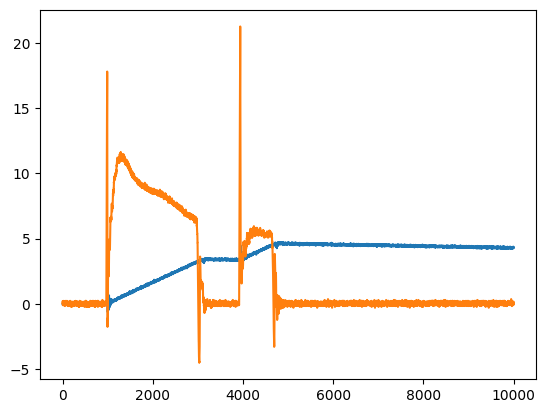

In [14]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
iD =  df.CH2.values # x100 probe
iD = iD -iD[:500].mean()
iD = iD /0.150 # v= ri , r = R150
iD = iD/2
plt.plot(il)
plt.plot(iD)

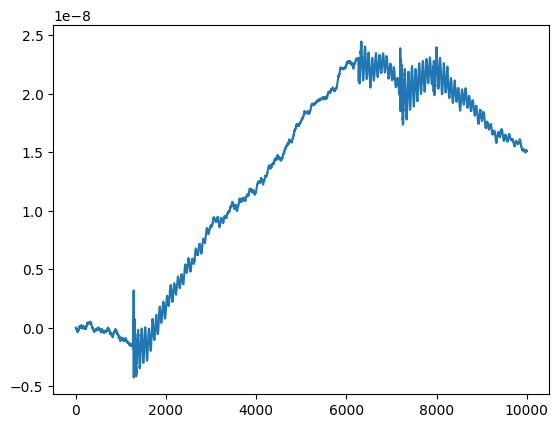

In [37]:
import scipy 
Id= scipy.integrate.cumulative_trapezoid(y= id_d, dx =Ts, initial = 0)
plt.plot(-Id)

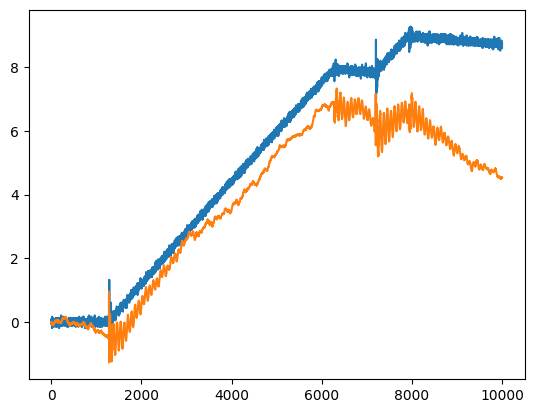

In [42]:
k = -30e7
Id= k*scipy.integrate.cumulative_trapezoid(y= id_d, dx =Ts, initial = 0)

plt.plot(il)
plt.plot(Id)

# B H curve

In [ ]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("2025-11-15_15-23-06-834.csv")
df.head(2)

,CH1,CH3,time,Ts
0,1.840156,-1.807813,0.000000e+00,2.000000e-09
1,1.859687,-2.193750,2.000000e-09,NaN


In [11]:
vds = df.CH1.values*100
IL= df.CH3.values
Ts= df.Ts.values[0]
Ts

np.float64(2e-09)

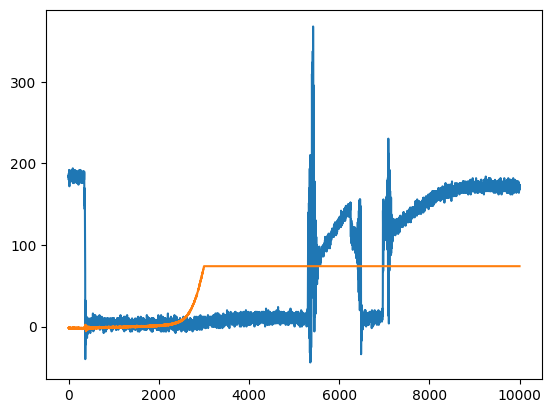

In [17]:
plt.plot(vds)
plt.plot(IL)

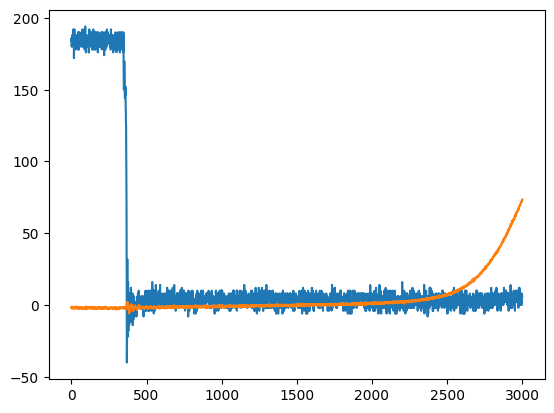

In [39]:
ILM = IL.max()
mask = IL < ILM*0.999

vds_= vds[mask]
IL_ = IL[mask]
plt.plot(vds_)
plt.plot(IL_)

In [42]:
i = np.where( vds_ < 25)[0][0]
vds__=vds_[i:]
IL__= IL_[i:]

np.float64(-2.047672193877551)

184.41226311953352 -2.047672193877551


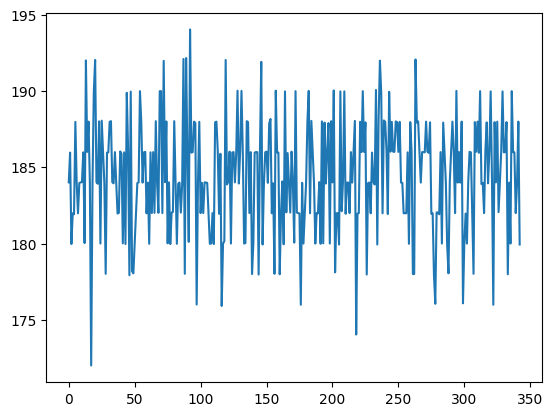

In [57]:
plt.plot(vds_[:i-25])
E = vds_[:i-25].mean()
I0= IL_[:i-25].mean()
print(E, I0)

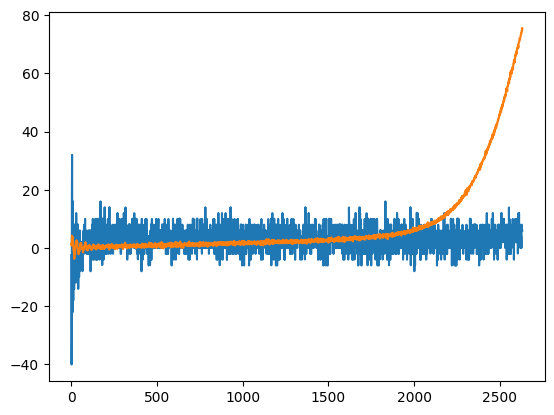

In [59]:
plt.plot(vds__)
plt.plot(IL__-I0)

In [51]:
H.shape ,B.shape, lambda_linkage.shape

((2633,), (1,), (1,))

Text(0, 0.5, 'B mT')

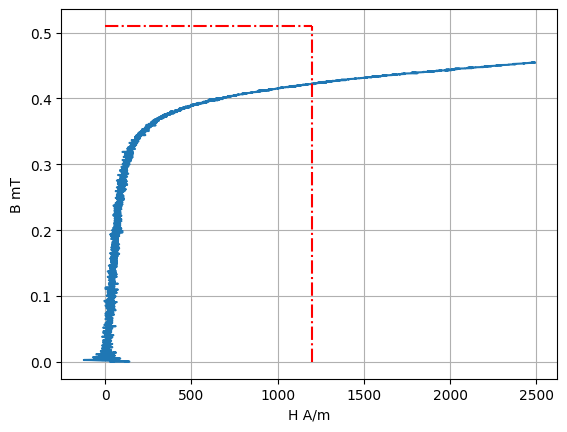

In [60]:
# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
#lambda_linkage = np.cumsum(vds_) * Ts              # Wb-turn
lambda_linkage =   np.linspace(0,len(vds__) * Ts*E, len(vds__))
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  


le_mm = 121.2 #mm ELP 102/20/38 with I 102/7/38
le=le_mm *1e-3 # m
H = N*(IL__-I0)/le


H_= H
Hsat =1200
#i = np.argmin(np.abs(H_-Hsat))
#Bsat_cal = B[i]
#print(Bsat_cal*1000, "mT") # 304.7746755662612 mT
plt.plot(H, B)
#plt.plot([Hsat, Hsat], [0,Bsat_cal], c="g")
#plt.plot([0, Hsat], [Bsat_cal,Bsat_cal], c="g")

#plt.plot([Hsat, Hsat], [0,0.3], c="r", linestyle="-.")
#plt.plot([0, Hsat], [0.3,0.3], c="r", linestyle="-.")
# phi = B*A = L*i 
#plt.xlim([-100,None])
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)
plt.grid()
Hsat =1200
plt.plot([Hsat, Hsat], [0,0.51], c="r", linestyle="-.")
plt.plot([0, Hsat], [0.51,0.51], c="r", linestyle="-.")
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf
plt.xlabel("H A/m")
plt.ylabel ("B mT")

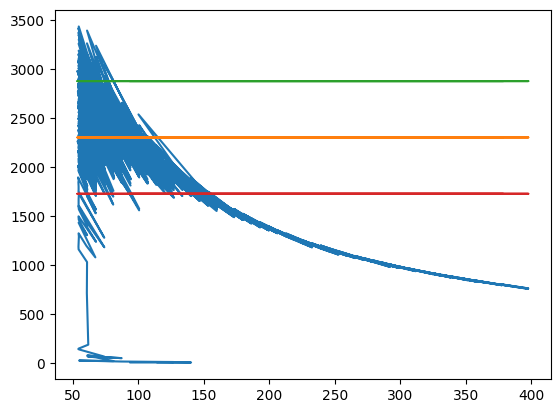

In [64]:
#B = u0 ue H 
#mu_0
from math import pi
mu_0 =  4*pi *10**-7 #μ 0 = 4 π ∗ 10 − 7 H / m

mu_e= B/(H*mu_0)
mask = (H> 50) & (H< 400)


x = H[mask]
y = mu_e[mask]

plt.plot(x, y)
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf
plt.plot(x, [2300]*len(x))
plt.plot(x, [2300*1.25]*len(x)) # +25%
plt.plot(x, [2300*0.75]*len(x)) # -25%
#2300

In [70]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf

N = 4
Ae_mm2 = 534.2


E= 200 # 400/2
time = 5e-6 # 5u ==> 100khz 
lambda_linkage =   E*time
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  
print(f"Bpeak = {1e3*B:.0f}mT")
# Bpeak = 468mT

Bpeak = 468mT
